# MOVIES MOVIES MOVIES !!!

In [131]:
import requests
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import _sqlite3 as sql

## Step 1: Data Collection

In [130]:
# downloading the data. These are datasets provided for non-commercial use
url= 'https://datasets.imdbws.com/title.basics.tsv.gz';
url2= 'https://datasets.imdbws.com/title.ratings.tsv.gz';

titledata= requests.get(url);
ratingdata= requests.get(url2);

title_filename= 'title_data.tsv.gz';
ratings_filename= 'ratings.tsv.gz';

# write the files to our directory
open(title_filename, 'wb').write(titledata.content);
open(ratings_filename, 'wb').write(ratingdata.content);

KeyboardInterrupt: 

In [ ]:
# reading the data into panda dataframes
title_df= pd.read_csv(title_filename, sep="\t", compression="gzip", dtype={'isAdult': str});
ratings_df= pd.read_csv(ratings_filename, sep="\t", compression="gzip");
print(title_df.head(5), ratings_df.head(5))

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short         tconst  averageRating  numVotes
0  tt0000001            5.7      1971
1  tt0000002            5.8       263
2  tt0000003   

## Step 2: Data Processing

Merge our two datasets into the same datafram

In [ ]:
# when u remove and clean values
df = pd.merge(left=title_df, right=ratings_df, on='tconst', how='inner')

In [ ]:
df.drop(labels=['endYear'],axis=1, inplace=True)

In [ ]:
df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short",5.7,1971
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short",5.8,263
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",6.5,1817
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short",5.6,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short",6.2,2613


Keep only the titles named movies

We need to parse certain columns to integers

In [ ]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

Here we are only looking at movies so we can drop all other forms of media (short films, shows, ...). We are analyzing these movies over time thus, we can drop any movies without a release date ('startYear'). Then, we need to convert the release dates from strings to integers so we can plot them.

In [ ]:
# keep only movies
df = df[df['titleType'] == 'movie']
# drop movies without a release date
df = df[df['startYear'] != '\\N']
# convert release date from strings to integers
df['startYear'] = df['startYear'].apply(int)

Something about bias here...

In [ ]:
# 1 if isAdult else, if it's any other value (0 or invalid)
# TODO comment on how this will introduce bias
function = lambda x: True if x == '1' else False
df['isAdult'] = df['isAdult'].apply(function)

In [ ]:
df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894,45,Romance,5.3,204
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,100,"Documentary,News,Sport",5.3,469
326,tt0000502,movie,Bohemios,Bohemios,False,1905,100,\N,4.1,15
358,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70,"Action,Adventure,Biography",6.0,826
366,tt0000591,movie,The Prodigal Son,L'enfant prodigue,False,1907,90,Drama,4.4,20


## Step 3: Exploratory Analysis and Data Vizualization

Text(0.5, 1.0, 'Frequency of Genres by Year')

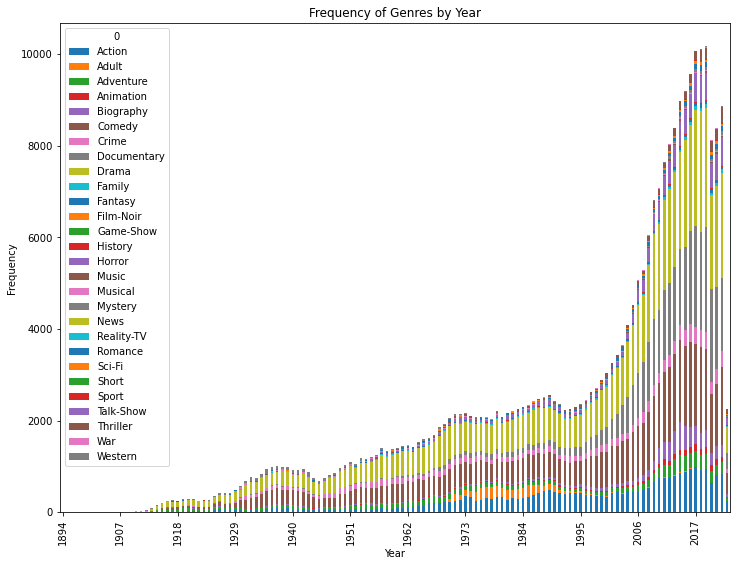

In [138]:
#This block is looking at the frequency of genre over time
#The first step is to split a data cell of a movie with multiple genres into separate cells
genre = df['genres'].str.split(",", n=2, expand = True)
#Then we add in year into our new dataframe
genre.insert(3, "year", df['startYear'], True)
#We delete NaN and Null values
genre = genre[genre[0] != '\\N']
#We drop the secondary and tertiary genres as we are only looking at the primary genre
genre.drop([1, 2], axis=1)
#We then group the genre by year and put it in a data frame
genre_tot = genre[[0, 'year']].groupby('year')[0].value_counts().reset_index(name='count')
genre.groupby(['year', 0]).size().unstack().plot.bar(stacked=True, figsize=(12, 9))
plt.locator_params(axis='x', nbins=12)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency of Genres by Year")


In [ ]:
df.sort_values(by=['numVotes'], ascending=False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
82553,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,False,1994,142,Drama,9.3,2737197
250352,tt0468569,movie,The Dark Knight,The Dark Knight,False,2008,152,"Action,Crime,Drama",9.0,2710299
637705,tt1375666,movie,Inception,Inception,False,2010,148,"Action,Adventure,Sci-Fi",8.8,2405897
99038,tt0137523,movie,Fight Club,Fight Club,False,1999,139,Drama,8.8,2179464
81458,tt0109830,movie,Forrest Gump,Forrest Gump,False,1994,142,"Drama,Romance",8.8,2130000
82336,tt0110912,movie,Pulp Fiction,Pulp Fiction,False,1994,154,"Crime,Drama",8.9,2103444
96890,tt0133093,movie,The Matrix,The Matrix,False,1999,136,"Action,Sci-Fi",8.7,1952567
90337,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,False,2001,178,"Action,Adventure,Drama",8.8,1911215
46207,tt0068646,movie,The Godfather,The Godfather,False,1972,175,"Crime,Drama",9.2,1903471
395431,tt0816692,movie,Interstellar,Interstellar,False,2014,169,"Adventure,Drama,Sci-Fi",8.6,1901239


## Analysis, Hypothesis Testing, and Machine Learning

In [ ]:
# more in depth, test hypotheses coming from the graphs

## Insight and Policy Decision

## Conclusion